In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
%matplotlib inline

import time
import PIL
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [34]:
# Load model
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

feature_extractor = hub.KerasLayer(URL, input_shape=(224, 224,3))

In [35]:
feature_extractor.trainable = False

In [36]:
model = tf.keras.Sequential([
    feature_extractor,
    tf.keras.layers.Dense(102, activation="softmax")
])
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense_1 (Dense)              (None, 102)               130662    
Total params: 2,388,646
Trainable params: 130,662
Non-trainable params: 2,257,984
_________________________________________________________________


In [37]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"] )

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
valid_datagen = ImageDataGenerator(rescale=1/255)



train_generator = train_datagen.flow_from_directory(
    os.path.join('/content/drive/MyDrive/flower/train'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

validation_generator = valid_datagen.flow_from_directory(
    os.path.join('/content/drive/MyDrive/flower/valid'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

Found 8244 images belonging to 102 classes.
Found 818 images belonging to 102 classes.


In [39]:
class_names = train_ds.class_names
class_names1 = valid_ds.class_names
print(class_names)
print(class_names1)

['1', '10', '100', '101', '102', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']
['1', '10', '100', '101', '102', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66',

Found 8244 files belonging to 102 classes.
Found 818 files belonging to 102 classes.


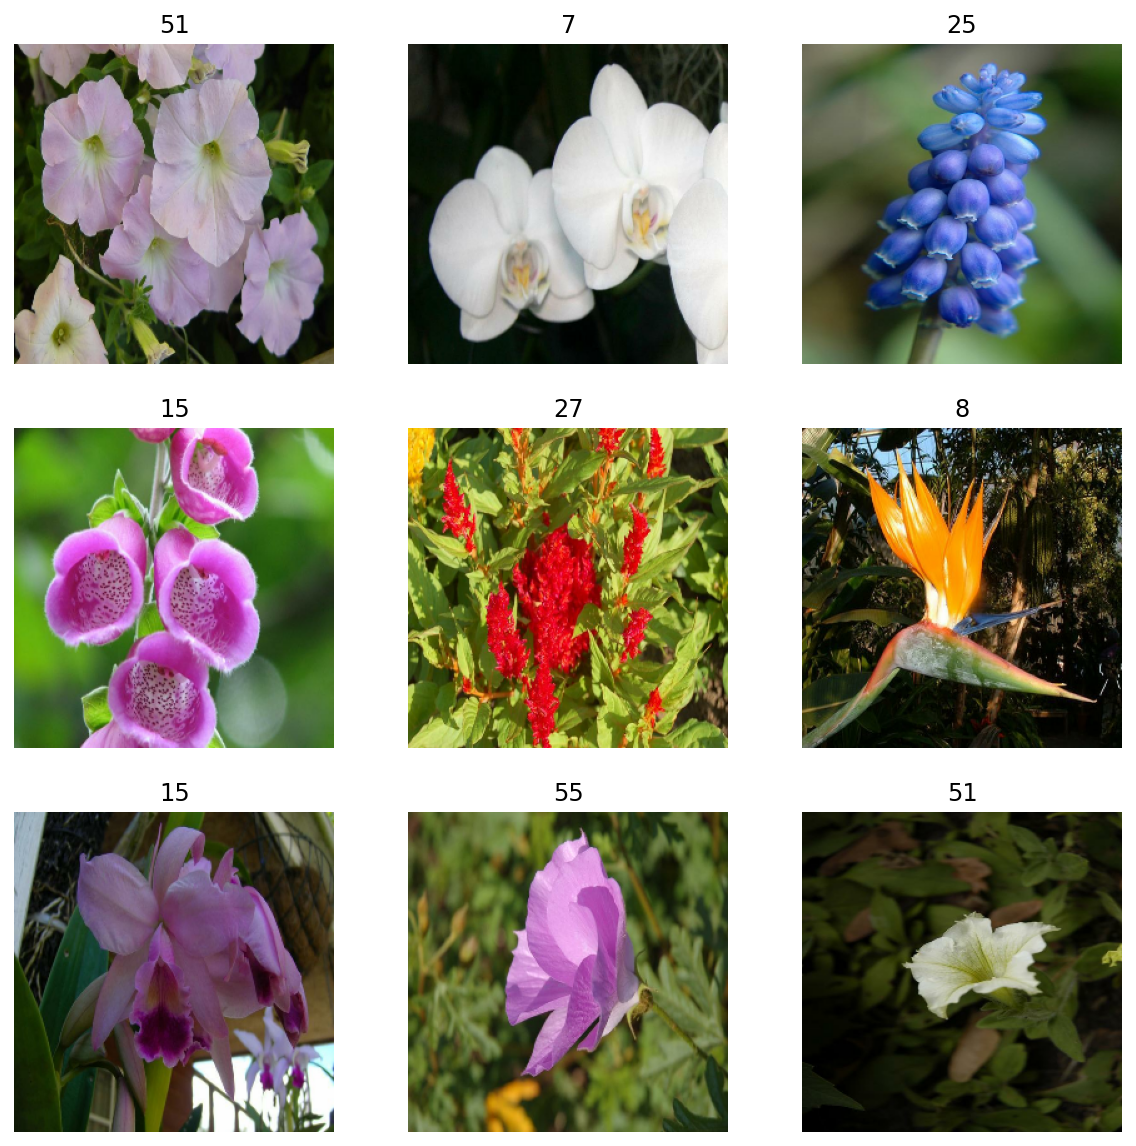

In [40]:
data_dir = os.path.join('/content/drive/MyDrive/flower/train')
valid_dir = os.path.join('/content/drive/MyDrive/flower/valid')

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir)
valid_ds = tf.keras.preprocessing.image_dataset_from_directory(
  valid_dir)

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [61]:
EPOCHS = 8

history = model.fit(train_generator, epochs=EPOCHS, validation_data=validation_generator)

Epoch 1/8
258/258 [==============================] - 315s 1s/step - loss: 0.4433 - accuracy: 0.7566 - val_loss: 0.6966 - val_accuracy: 0.7494
Epoch 2/8
258/258 [==============================] - 312s 1s/step - loss: 0.4289 - accuracy: 0.7523 - val_loss: 0.5970 - val_accuracy: 0.8020
Epoch 3/8
258/258 [==============================] - 309s 1s/step - loss: 0.4316 - accuracy: 0.7591 - val_loss: 0.6519 - val_accuracy: 0.7738
Epoch 4/8
258/258 [==============================] - 315s 1s/step - loss: 0.4272 - accuracy: 0.7561 - val_loss: 0.8018 - val_accuracy: 0.7115
Epoch 5/8
258/258 [==============================] - 302s 1s/step - loss: 0.4216 - accuracy: 0.7552 - val_loss: 0.6378 - val_accuracy: 0.7726
Epoch 6/8
258/258 [==============================] - 316s 1s/step - loss: 0.4206 - accuracy: 0.7495 - val_loss: 0.7828 - val_accuracy: 0.7152
Epoch 7/8
258/258 [==============================] - 305s 1s/step - loss: 0.4118 - accuracy: 0.7517 - val_loss: 0.6557 - val_accuracy: 0.7738
Epoch 

In [15]:
image_size = 224

def process_image(image):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, (image_size, image_size))
    image /= 255
    image = image.numpy()
    return image

In [16]:
from PIL import Image
# TODO: Create the predict function
def predict(image_path, model, top_k):
    image = Image.open(image_path)
    image = np.asarray(image)
    
    processed_image = process_image(image)
    processed_image = np.expand_dims(processed_image,axis=0)
    ps = model.predict(processed_image)
    probs = ps[0]
    
    # Get k indexes of sorted probs
    top_indexes = np.argsort(probs)[-top_k:]
    
    # Reverse array
    top_indexes = top_indexes[::-1]
    
    #top_probs = probs.sort()[-top_k:]
    probs.sort()
    probs = probs[-top_k:][::-1]
    return (probs,top_indexes)

In [30]:
from PIL import Image
def show_image(image_path, label, prob=""):
    image = PIL.Image.open(image_path)
    image = np.asarray(image)
    image = process_image(image)

    plt.imshow(image)
    plt.title(str(label) +"  " + str(prob))
    plt.show()
    return

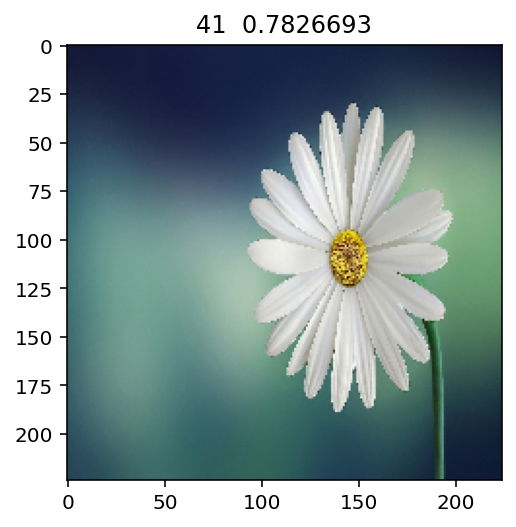

In [67]:
from PIL import Image
image_path = '/content/drive/MyDrive/flower/marguerite-729510_1920.jpg'
(probs, classes) = predict(image_path, model, 5)

show_image(image_path, class_names[int(classes[0])], probs[0])


In [68]:
tf.saved_model.save(model,'/content/drive/MyDrive/flower')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/flower/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/flower/assets


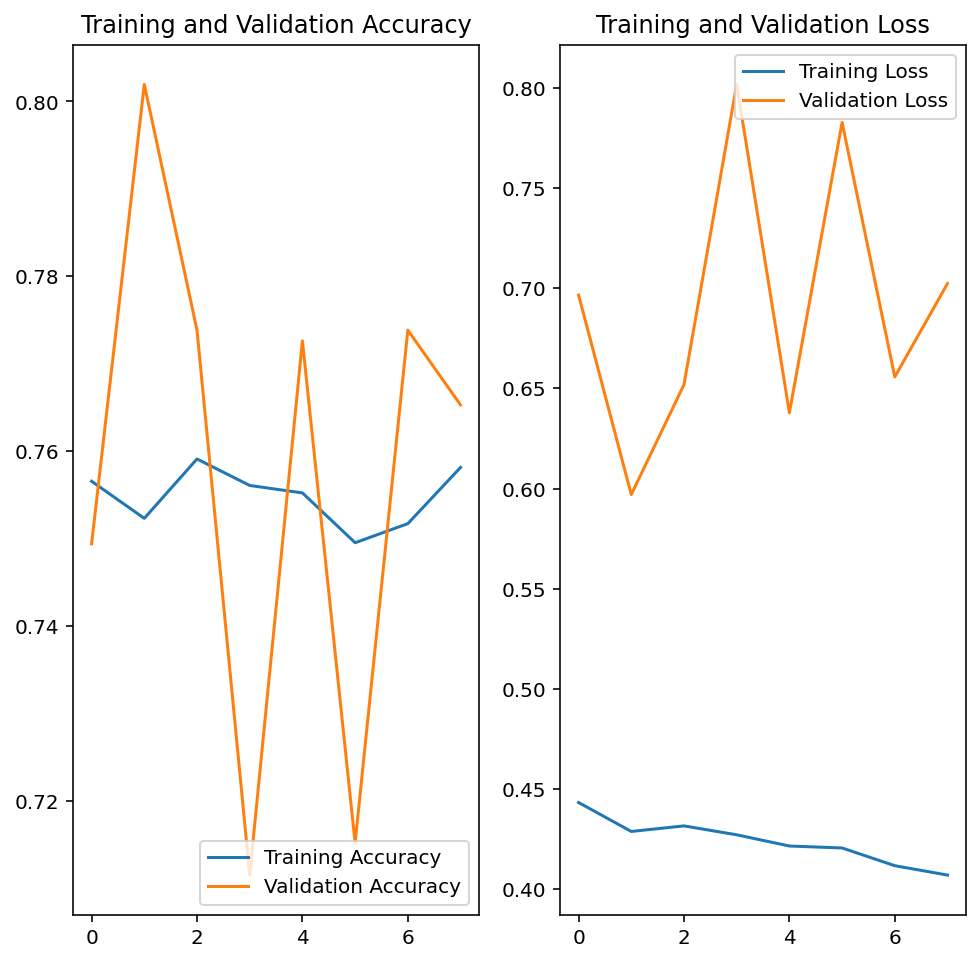

In [66]:
# TODO: Plot the loss and accuracy values achieved during training for the training and validation set.
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range=range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()